In [1]:
import os, random, matplotlib, pickle, yaml
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter
from matplotlib.colors import ListedColormap
from glob2 import glob

SMALL_SIZE, MEDIUM_SIZE = 9, 12
PROJECT_PATH = "/Users/donghur/Desktop/Research/Murthy/BM_GPU"

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

def matplotlib_text(font=SMALL_SIZE, axes_title=SMALL_SIZE, axes_label=MEDIUM_SIZE, xtick=SMALL_SIZE, ytick=SMALL_SIZE, legend=SMALL_SIZE, figure=BIGGER_SIZE):
    plt.rc('font', size=font)          # controls default text sizes
    plt.rc('axes', titlesize=axes_title, labelsize=axes_label)     # fontsize of the axes title
    plt.rc('xtick', labelsize=xtick)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=ytick)    # fontsize of the tick labels
    plt.rc('legend', fontsize=legend)    # legend fontsize
    plt.rc('figure', titlesize=figure)  # fontsize of the figure title

In [3]:
result_path = "../results/round3"
with open(f"{result_path}/INFO.yaml") as f:
    INFO = yaml.load(f, Loader=yaml.FullLoader)
    INFO_values = list(INFO.values())
    INFO_values.sort(key=lambda x: x['order'])

In [4]:
config_path = ".."
with open(f"{config_path}/config.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
skeleton = config['skeleton']
skeleton_color = config['skeleton_color']

In [17]:
root_path = ".."
rot_bp, unscaled_rot_bp, angles, limbs, unscaled_limbs = [], [], [], [], []
angle_power, limb_power = [], []
all_embed = []
labels = []

for file in tqdm(INFO_values):
    rot_bp_temp = np.load(f"{root_path}/{file['directory']}/rotated_bodypoints.npy") 
    unscaled_rot_bp_temp = np.copy(rot_bp_temp)
    unscaled_rot_bp_temp[:,:,:2] *= file['scale_factor']
    
    limbs_temp = np.load(f"{root_path}/{file['directory']}/limbs.npy")
    unscaled_limbs_temp = np.copy(limbs_temp)
    unscaled_limbs_temp *= file['scale_factor']
    
    # Signal
    rot_bp.append( rot_bp_temp )
    unscaled_rot_bp.append( unscaled_rot_bp_temp )
    angles.append( np.load(f"{root_path}/{file['directory']}/angles.npy") )
    limbs.append( limbs_temp )
    unscaled_limbs.append( unscaled_limbs_temp )
    # Power
    angle_power.append( np.load(f"{root_path}/{file['directory']}/angle_power.npy") )
    limb_power.append( np.load(f"{root_path}/{file['directory']}/limb_power.npy") )
    # Embeddings
    all_embed.append( np.load(f"{root_path}/{file['directory']}/all_embeddings.npy") )
    # Clusters
    labels.append( np.load(f"{root_path}/{file['directory']}/cluster.npy") )
    
# Signal
rot_bp = np.concatenate(rot_bp)
unscaled_rot_bp = np.concatenate(unscaled_rot_bp)
angles = np.concatenate(angles)
limbs = np.concatenate(limbs)
unscaled_limbs = np.concatenate(unscaled_limbs)
# Power
angle_power = np.concatenate(angle_power)
limb_power = np.concatenate(limb_power)
# Embeddings
all_embed = np.concatenate(all_embed)
# Clusters
labels = np.concatenate(labels)

In [18]:
unscaled_limbs.shape

(1883492, 13)

<hr>
<hr>

[15, 25, 25, 15, 15, 25, 25, 25, 15, 15, 25, 25, 25]

In [19]:
num_fr = len(all_embed)
(good_fr, good_bp) = np.where( ~np.isnan(all_embed) )
(bad_fr, bad_bp) = np.where( np.isnan(all_embed) )

good_fr = np.unique(good_fr)
bad_fr = np.unique(bad_fr)

limb_min, limb_max = np.min(unscaled_limbs[good_fr,:]), np.max(unscaled_limbs[good_fr,:])
limb_power_min, limb_power_max = np.min(limb_power[good_fr,:,:]), np.max(limb_power[good_fr,:,:])

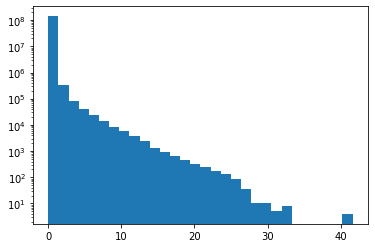

In [57]:
plt.hist(limb_power[good_fr,:,:].flatten(), 30, log=True)
plt.show()

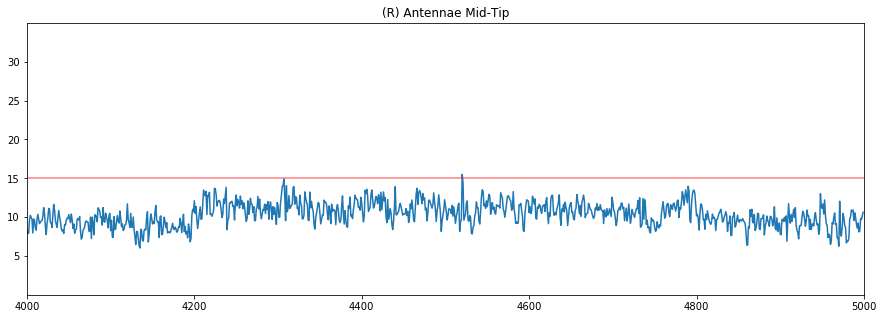

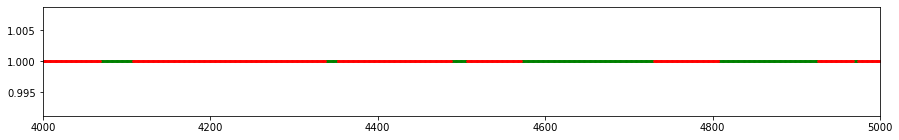

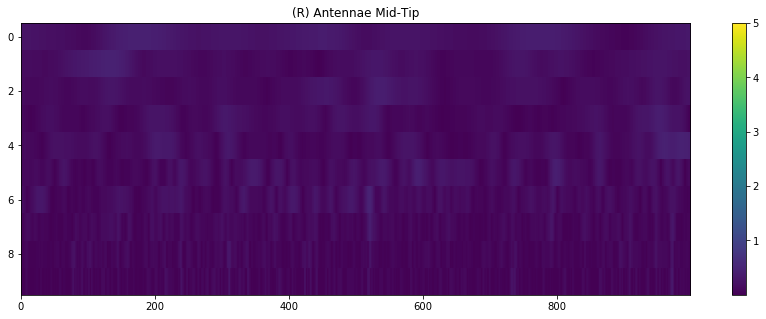

In [65]:
start_fr, fr_length = 4000, 1000

stop_fr = start_fr + fr_length
limb_i = 3

good_fr_idx = np.where((good_fr>=start_fr) & (good_fr<=stop_fr))[0]
bad_fr_idx = np.where((bad_fr>=start_fr) & (bad_fr<=stop_fr))[0]


fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.arange(start_fr, stop_fr), unscaled_limbs[start_fr:stop_fr,limb_i])
ax.axhline(y=config['limb_threshold'][limb_i], c='r', alpha=0.5)
ax.set(title=config['limb_labels'][limb_i], xlim=(start_fr, stop_fr), ylim=(limb_min, limb_max))
plt.show()

fig, ax = plt.subplots(figsize=(15,2))
ax.scatter(good_fr[good_fr_idx], np.ones(len(good_fr_idx)), c='g', s=3)
ax.scatter(bad_fr[bad_fr_idx], np.ones(len(bad_fr_idx)), c='r', s=3)
ax.set(xlim=(start_fr, stop_fr))
plt.show()

fig, ax = plt.subplots(figsize=(15,5))
im = ax.imshow(limb_power[start_fr:stop_fr,:,limb_i].T, aspect="auto", 
          norm=matplotlib.colors.Normalize(vmin=limb_power_min, vmax=5))
ax.set(title=config['limb_labels'][limb_i])
fig.colorbar(im, ax=ax)
plt.show()

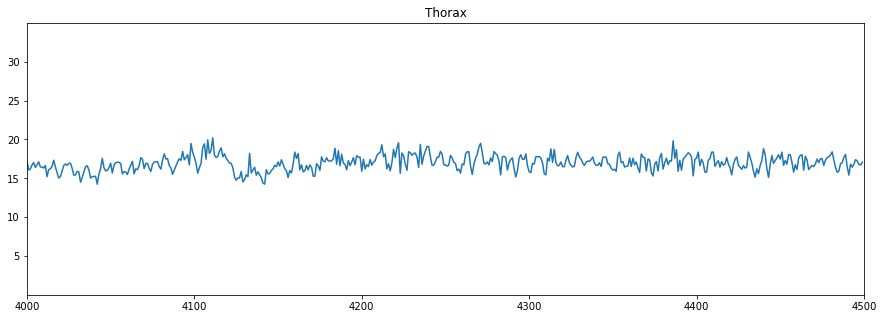

In [45]:
limb_i = 1
start_fr, stop_fr = 4000, 4500

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(np.arange(start_fr, stop_fr), unscaled_limbs[start_fr:stop_fr,limb_i])
ax.set(title=config['limb_labels'][limb_i], xlim=(start_fr, stop_fr), ylim=(limb_min, limb_max))
plt.show()


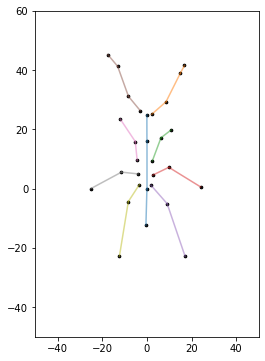

In [29]:
skeleton = config['skeleton']
skeleton_color = config['skeleton_color']

fr_i = 1000

fig, ax = plt.subplots(figsize=(4, 6))
ax.scatter(unscaled_rot_bp[fr_i,:,0], unscaled_rot_bp[fr_i,:,1], s=7, alpha=1, c='k')
ax.set(xlim=np.array([-2.5,2.5])*20, ylim=np.array([-2.5,3.0])*20)
for skeleton_i, color_i in zip(skeleton, skeleton_color):
    ax.plot(unscaled_rot_bp[fr_i,skeleton_i,0], unscaled_rot_bp[fr_i,skeleton_i,1], alpha=0.5, c=color_i)
plt.show()

In [59]:
np.max(angles)

1.0

In [87]:
num_cluster = int(np.max(labels)+1)
num_limbs = limbs.shape[1]

limb_clust_mean = np.zeros((num_cluster, num_limbs))
limb_clust_median = np.zeros((num_cluster, num_limbs))
limb_clust_std = np.zeros((num_cluster, num_limbs))

for i in tqdm(range(num_cluster)):
    idx = np.where(labels==i)[0]
    limb_clust_mean[i,:] = np.mean(limbs[idx], axis=0)
    limb_clust_median[i,:] = np.median(limbs[idx], axis=0)
    limb_clust_std[i,:] = np.std(limbs[idx], axis=0)


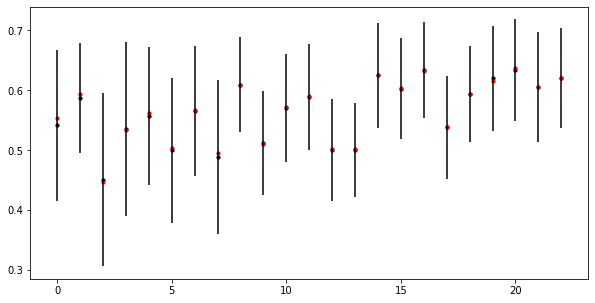

In [88]:
limb_i = 3

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(range(num_cluster), limb_clust_mean[:,limb_i], c='k',s=10)
ax.scatter(range(num_cluster), limb_clust_median[:,limb_i], c='r',s=10)
ax.errorbar(range(num_cluster), limb_clust_mean[:,limb_i], yerr=limb_clust_std[:,limb_i], linestyle='', c='k')
plt.show()

In [89]:
np.max(limbs)

60.58017792476512

In [92]:
for limb_i, (joint1_idx, joint2_idx) in enumerate(config['skeleton']):
    print(joint2_idx)

1
2
3
5
6
7
9
10
12
13
15
16
18
19
20
22
23
25
26
28
29
